# Ch02. 매출, 가장 많이 팔린 아이템 확인하기

### 목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

COLORS = sns.color_palette()  # seaborn 에서 정의해둔 색상 팔레트

%matplotlib inline

# 데이터 로딩
정제된 데이터

In [5]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
}

retail = pd.read_csv(r'D:\DevRoot\DataSet\OnlineRetailClean.csv', dtype=dtypes) # dtype 지정 가능
retail.drop('Unnamed: 0', axis=1, inplace=True)
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int32  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float32
 6   CustomerID     397884 non-null  int32  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(1), object(4)
memory usage: 22.8+ MB


## 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [7]:
pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

# 원하는 형식의 데이터 설정도 가능하다.
# infer_datetime_format=True  <-- 데이터를 살펴보아, 자동으로 포맷 세팅

# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# ↓ 아래에서 확인해보자.

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
397879   2011-12-09 12:50:00
397880   2011-12-09 12:50:00
397881   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397883   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [8]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int32         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float32       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(1), object(3)
memory usage: 22.8+ MB


---
## 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

# 전체 매출
"작년부터 올해까지 매출 데이터는?"

In [9]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [10]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [12]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

# 단위는 아마 유로?

8911407.904

# 국가별 매출
"어느나라에서 매출을 많이 올리고 있을까"

In [13]:
retail.groupby("Country")

In [14]:
retail.groupby("Country").sum()

,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
Country,,,,,
Australia,657415628,83901.0,3.612500e+03,1.472127e+07,1.385213e+05
Austria,223822318,4881.0,1.693900e+03,4.982601e+06,1.019868e+04
Bahrain,9397437,260.0,7.895000e+01,2.100270e+05,5.484000e+02
Belgium,1138462862,23237.0,7.372850e+03,2.524670e+07,4.119634e+04
Brazil,17606432,356.0,1.426000e+02,4.086080e+05,1.143600e+03
Canada,84252636,2763.0,9.105800e+02,2.615483e+06,3.666380e+03
Channel Islands,417972473,9491.0,3.389650e+03,1.113834e+07,2.045044e+04
Cyprus,341888568,6361.0,3.506180e+03,7.616904e+06,1.359038e+04
Czech Republic,13876340,671.0,7.827000e+01,3.195250e+05,8.267400e+02


In [15]:
retail.groupby("Country").sum()['CheckoutPrice']

Country
Australia               1.385213e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.045044e+04
Cyprus                  1.359038e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.655459e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.090240e+05
Germany                 2.288671e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.221690e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal                3.3439

In [17]:
# 정렬
rev_by_contries = retail.groupby("Country").sum()['CheckoutPrice'].sort_values()
rev_by_contries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

In [20]:
COLORS  # seaborn 에서 가져온 팔레트

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='Country'>

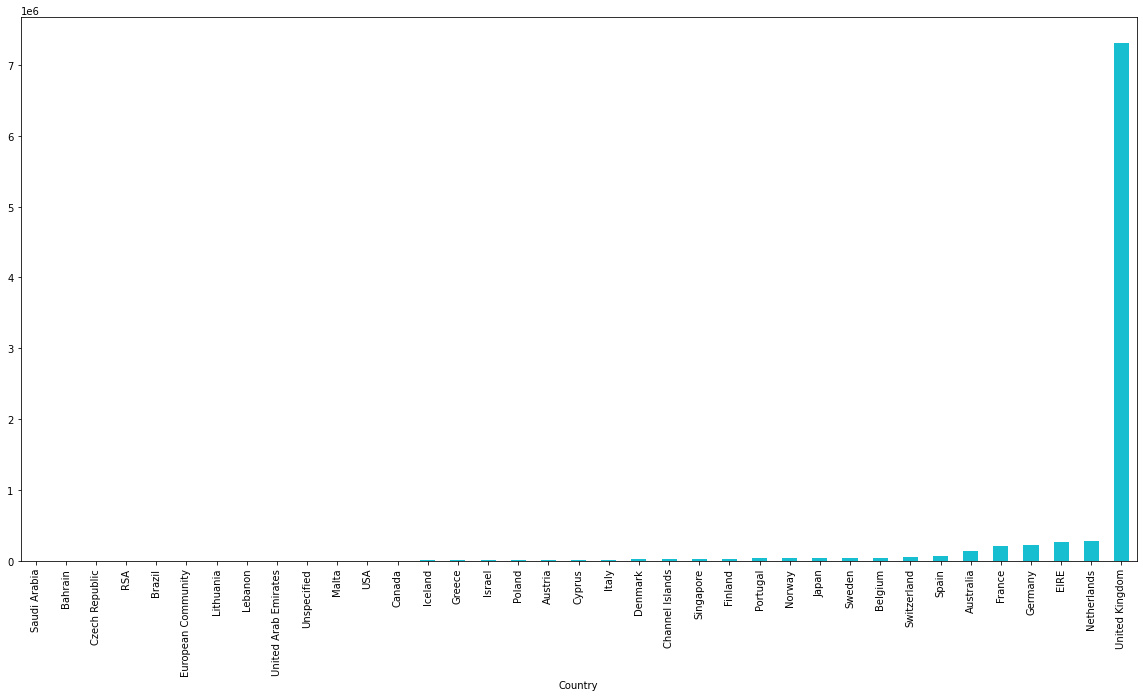

In [21]:
rev_by_contries.plot(kind="bar", figsize=(20, 10), color=COLORS[-1])

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

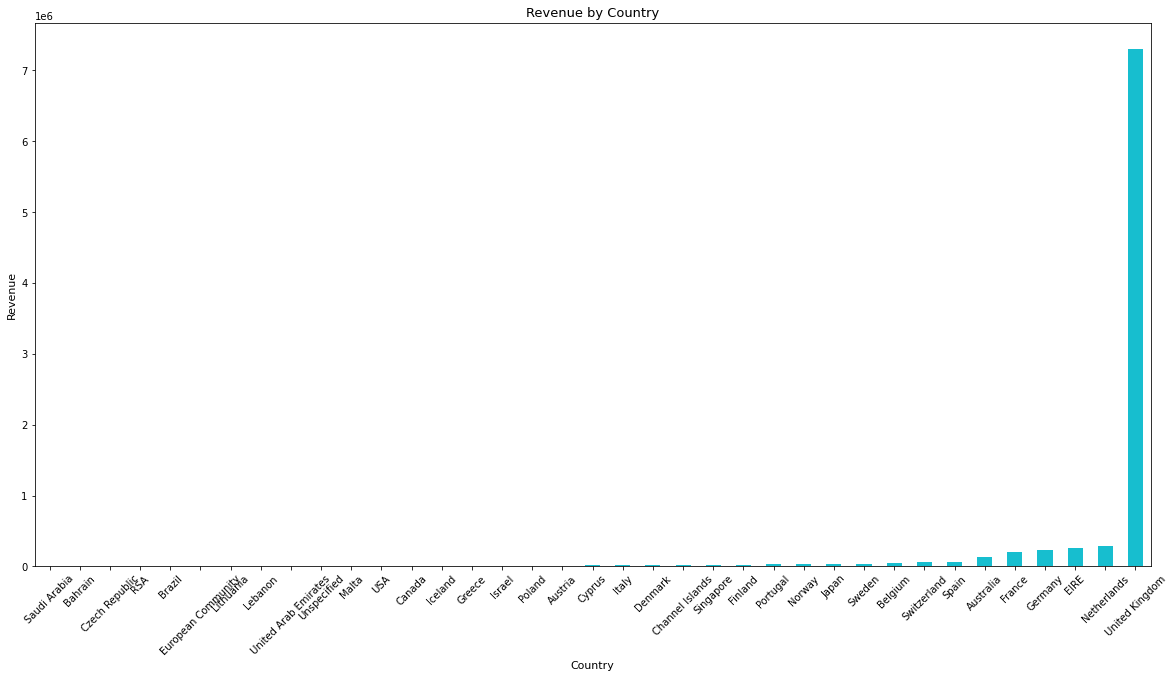

In [24]:
# 그래프에 설명 추가
plot = rev_by_contries.plot(kind="bar", figsize=(20, 10), color=COLORS[-1])
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_contries.index, rotation=45)

In [25]:
# 판매비율을 알고 싶다면

In [26]:
rev_by_contries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

####  그래프 유틸 함수
앞으로 계속 시각화 할 거임.

In [27]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind="bar", figsize=figsize, color=color)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

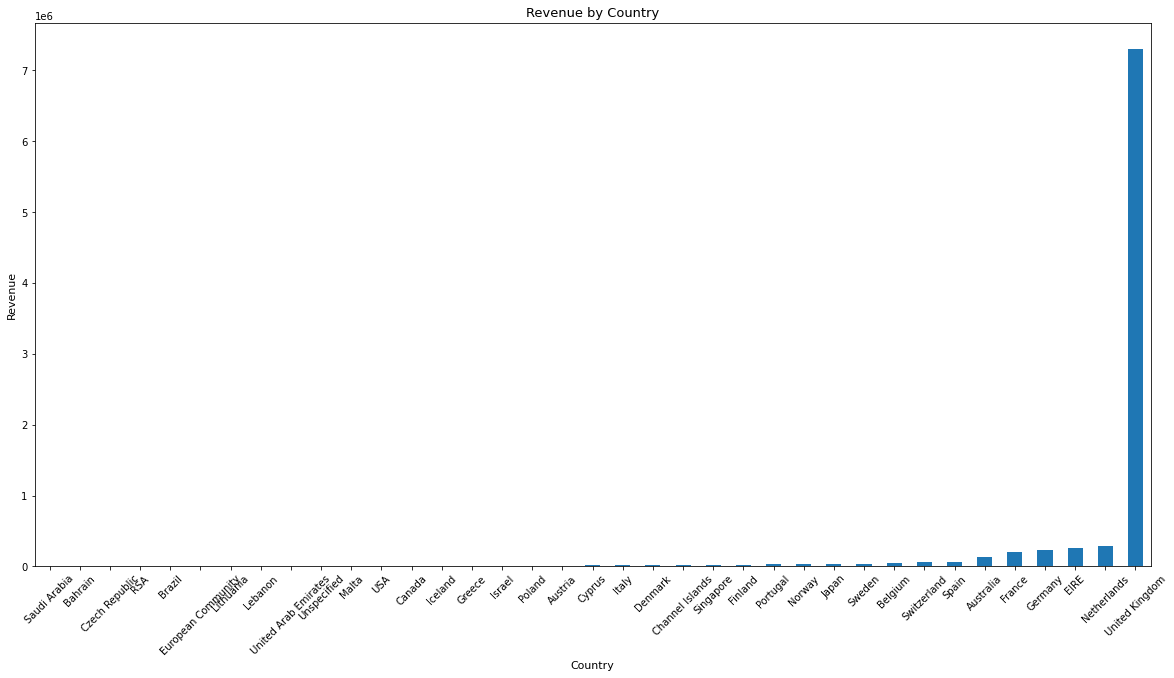

In [28]:
# 함수 동작 확인
plot_bar(rev_by_contries, 'Country', 'Revenue', 'Revenue by Country')

# 월별매출

In [29]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [30]:
# InvoiceDate 를 활용해야 한다.

In [33]:
time_stamp = retail['InvoiceDate'][0]
time_stamp

Timestamp('2010-12-01 08:26:00')

In [34]:
time_stamp.year

2010

In [35]:
time_stamp.month

12

In [36]:
time_stamp.dayofweek   # 요일  0: 월요일,  6: 일요일

2

In [37]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [38]:
# InvoiceDate 로 그룹핑 하기에는 
# 연도-월-일 시:분:초  를 갖고 있기 때문에 그냥 그룹핑은 안됩니다.
# 뭔가 '함수' 등을 이용해 '월' 만 뽑아서 그룹핑을 진행해야 합니다

In [39]:
# 일단, InvoiceDate 를 인덱스로 만들어 보자
retail.set_index('InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CheckoutPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60


In [40]:
# groupby(함수) 를 사용하여 '월별' 로 그룹핑해보자

In [52]:
# 함수작성
# 1월은 'yyyy01', 2월은 'yyyy02' ...

def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month
#     return str(date.year) + '{month:02d}'.format(month = int(date.month))

In [53]:
extract_month(retail['InvoiceDate'][0])

'201012'

In [54]:
extract_month(retail['InvoiceDate'][123000])

'201105'

In [55]:
# 월별 groupby

In [56]:
retail.set_index('InvoiceDate').groupby(extract_month).size()

201012    26157
201101    21229
201102    19927
201103    27175
201104    22642
201105    28320
201106    27185
201107    26825
201108    27007
201109    40028
201110    49554
201111    64531
201112    17304
dtype: int64

In [57]:
# 월별 합계 (전체 컬럼)
retail.set_index('InvoiceDate').groupby(extract_month).sum()

,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
201012,14072707240,312265,81935.609375,406196835,572713.890
201101,11492803914,349098,66964.992188,321863240,569445.040
201102,10841427849,265622,63185.757812,305207531,447137.350
201103,14860772808,348503,88563.101562,412653906,595500.760
201104,12452863569,292222,79005.484375,345925717,469200.361
201105,15669690030,373601,102128.281250,431128726,678594.560
201106,15138257658,363699,85274.726562,416663110,661213.690
201107,15030051462,369420,75919.898438,410674538,600091.011
201108,15216184267,398121,79423.828125,412055398,645343.900
201109,22702364753,544897,119053.062500,610865157,952838.382


In [59]:
# 월별 매출 합계
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

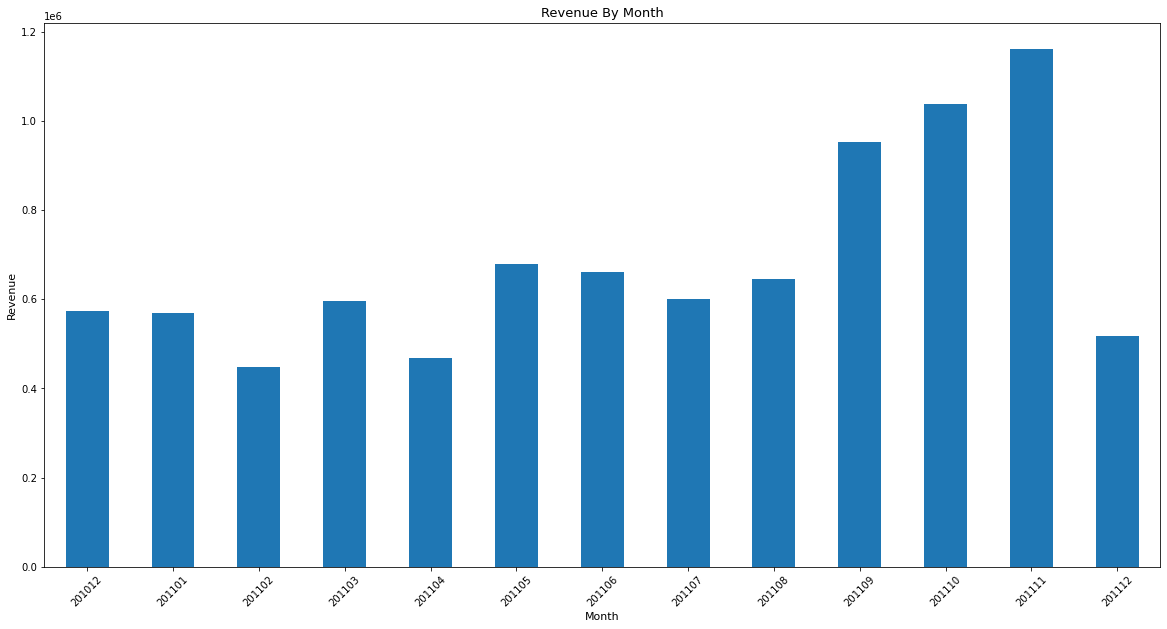

In [60]:
# 데이터 관찰, 10, 11, 12 매출이 높다.
# 시각화

plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue By Month')

# 요일별 매출
timestamp -> 요일

In [62]:
retail.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).size()

0    64893
1    66473
2    68885
3    80035
4    54825
6    62773
dtype: int64

In [64]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [ ]:
# 관찰
# 다른데이터가 없기 때문에 유추할수는 없지만
# 회사의 방침? 일까?  5 (토요일) 데이터가 없다

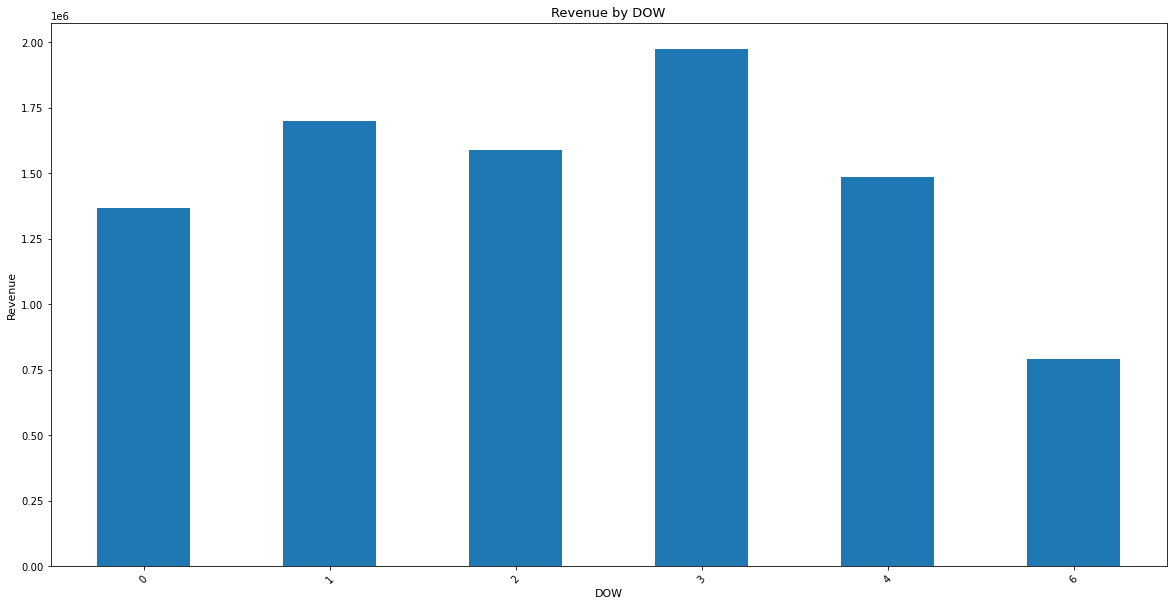

In [65]:
# 시각화
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

In [66]:
# x축 index 변경하기

In [67]:
DAY_OF_WEEK = ['Mon', 'Tue', 'Wed', "Thu", 'Fri', "Sat", 'Sun']  # 월요일 인덱스가 0 이라서.

In [68]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', "Thu", 'Fri', "Sat", 'Sun'])

In [69]:
rev_by_dow.index

Int64Index([0, 1, 2, 3, 4, 6], dtype='int64')

In [70]:
DAY_OF_WEEK[rev_by_dow.index]

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'], dtype='<U3')

In [71]:
# 기존 인덱스 변경!
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

In [72]:
rev_by_dow

Mon    1367146.411
Tue    1700634.631
Wed    1588336.170
Thu    1976859.070
Fri    1485917.401
Sun     792514.221
Name: CheckoutPrice, dtype: float64

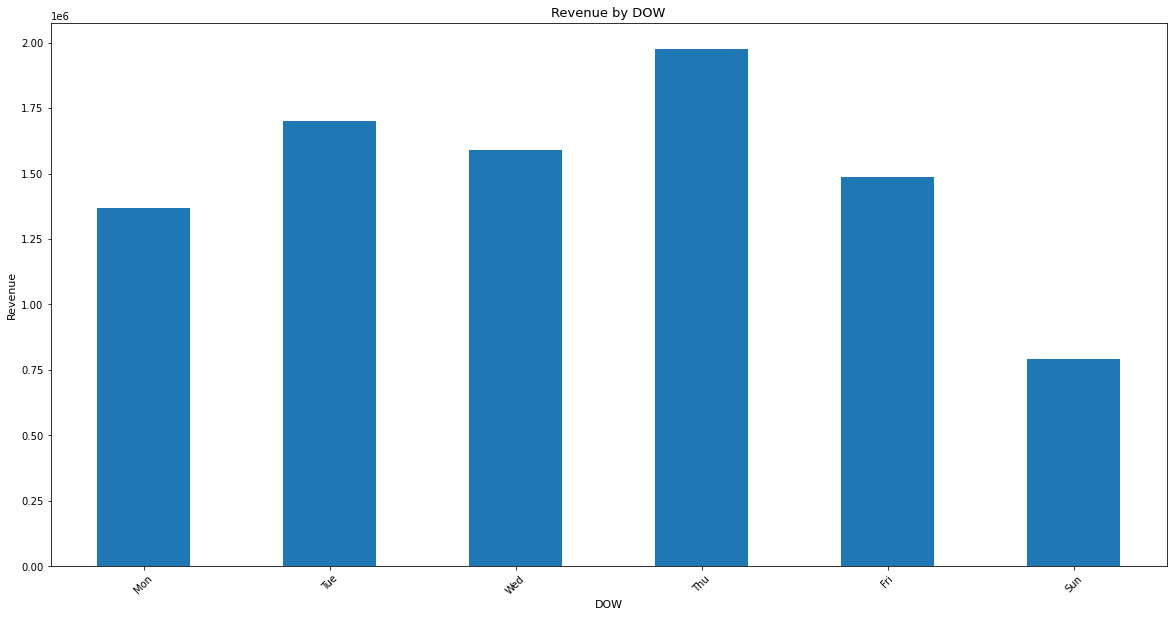

In [73]:
# 시각화
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

# 시간별 매출

In [75]:
retail.set_index('InvoiceDate').groupby(lambda date:date.hour).size()

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
dtype: int64

In [77]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
rev_by_hour

6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

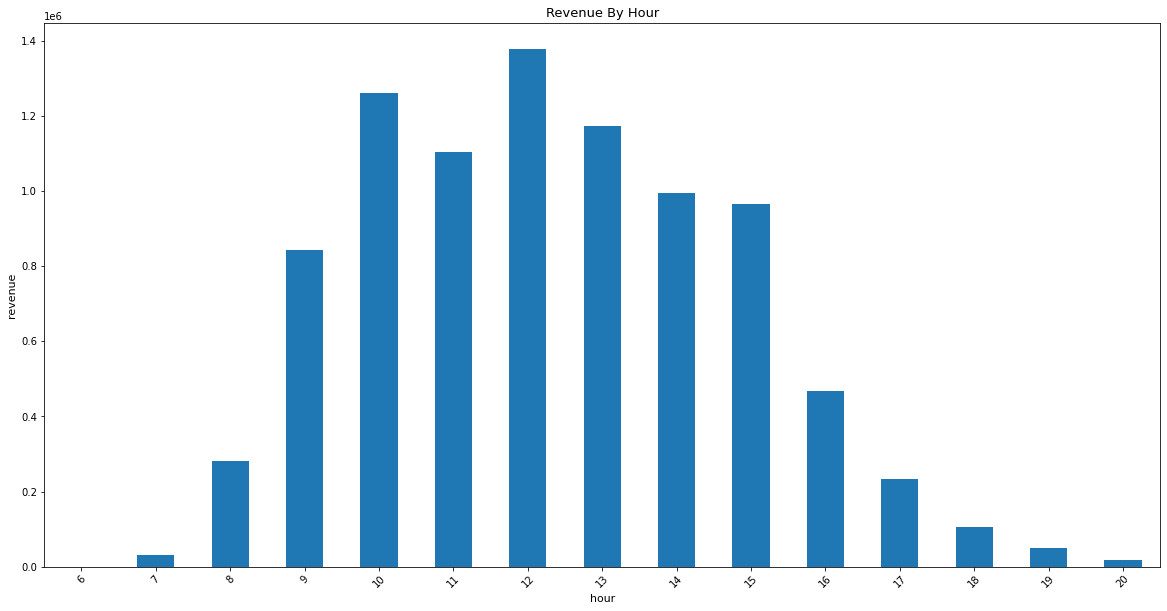

In [78]:
plot_bar(rev_by_hour, 'hour', 'revenue', 'Revenue By Hour')

In [79]:
# 결과 고찰
# 재미있는 사실.  새벽시간에 는 주문이 없다.
# 12시까지 증가세
# 3시 이후에는 팍 감소..

# 분석이란 이렇게 유추로부터 시작합니다
# "3시 이후에는 왜 떨어지는가?"
# 유추를 해보는 겁니다
# 직장인들이 퇴근을 하는 시간이라서?
# 그렇다면, 우리는 이 시간을 버리는 시간으로 보고
# 그 나머지 시간에 집중해야 한다... <-- 뭐 이런식으로 유추하면서 데이터 분석을 해나갈수 있겠죠

# 섣불리 유추하는 것은 굉장히 위험합니다.
# 현상을 보고,  그 현상을 파악하고 
# 거기서부터 '가설' 을 세우고, 그 가설을 '검증' 하기 위해서 
# 하나씩 테스트 (ex : A-B 테스트) 를 해보는 것이 중요합니다.

# 자. 암튼, 현상을 파악하는게 분석의 첫번째 단계입니다

# 그래서
# 지금까지 발견된것으로부터 정리를 해보겠씁니다 ↓

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)
    - 유추: 점심시간 자유,  15시부터는 퇴근 페이스

---
# 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [80]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CheckoutPrice'],
      dtype='object')

In [81]:
# 제품코드 StockCode 기준으로 그룹핑

In [82]:
retail.groupby('StockCode').size()

StockCode
10002       49
10080       21
10120       30
10123C       3
10124A       5
          ... 
C2         133
DOT         16
M          284
PADS         3
POST      1099
Length: 3665, dtype: int64

In [85]:
# 판매수량 TOP 10
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [86]:
# 매출 TOP 10
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue


StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

### top 3 아이템의 월별 판매량 추이

In [87]:
# 제품-월 : 2-level 의 그룹핑 해야 한다
# StockCode x extract_month() 사용

In [88]:
retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).size()

StockCode        
10002      201012     16
           201101     18
           201102      5
           201103      5
           201104      5
                    ... 
POST       201108     89
           201109    111
           201110    118
           201111    162
           201112     49
Length: 30407, dtype: int64

In [90]:
retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']]

# 위 결과는 '전체 상품' 에 대한 것이다.
# top 3 상품에 대한 결과를 만들어야 한다.

Quantity  CheckoutPrice
StockCode                                
10002     201012       224         190.40
          201101       337         286.45
          201102        50          42.50
          201103        23          19.55
          201104       189         160.65
...                    ...            ...
POST      201108       237        5185.95
          201109       279        5894.50
          201110       338        7993.50
          201111       460       10349.95
          201112       123        2760.00

[30407 rows x 2 columns]

In [91]:
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [92]:
top_selling[:3]  # top3 많이 팔린 아이템

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int32

In [93]:
top_selling[:3].index

Index(['23843', '23166', '84077'], dtype='object', name='StockCode')

In [96]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling[:3].index]
monthly_top3

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

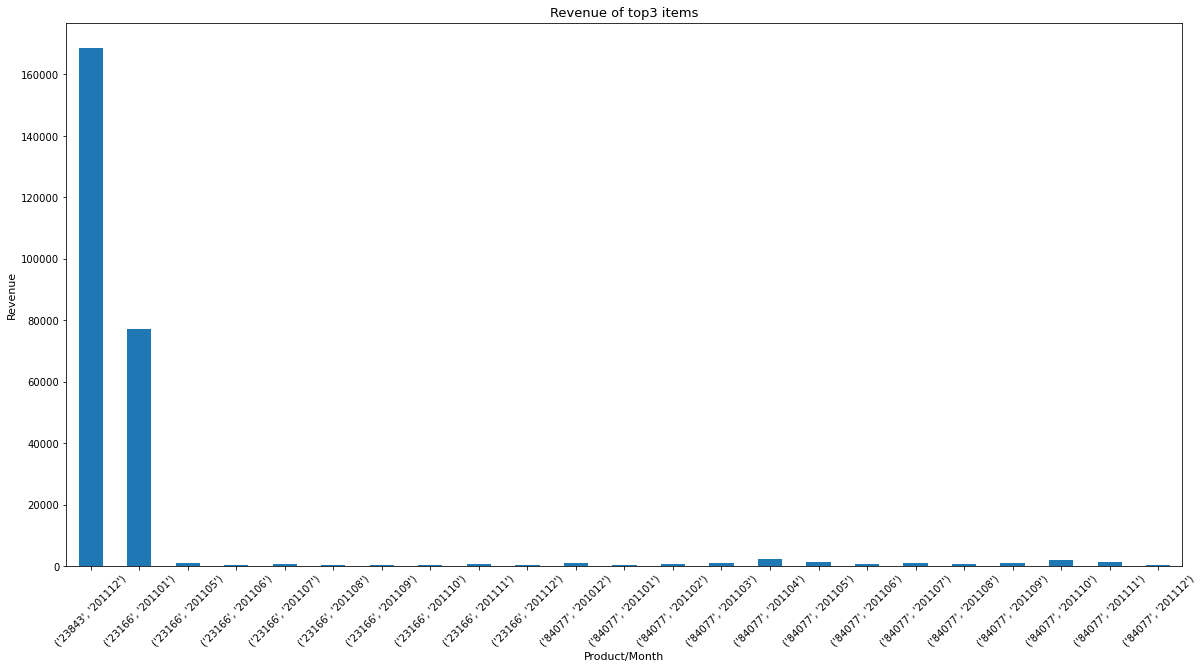

In [97]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', "Revenue", "Revenue of top3 items")